# Data Mining Homework 2 - GMM

## Problem 3

In [254]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import random
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

### Generating Data

In [255]:
mu1, mu2, mu3, sig = .5, 1, 2, 1

In [256]:
np.random.seed(42)
data1 = np.random.normal(loc = mu1, scale = sig, size = 3000)
data2 = np.random.normal(loc = -mu1, scale = sig, size = 3000)

In [257]:
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
print(df1.head())
print(df2.head())

          0
0  0.996714
1  0.361736
2  1.147689
3  2.023030
4  0.265847
          0
0 -2.407808
1 -1.360385
2 -0.913606
3  1.387688
4  0.056553


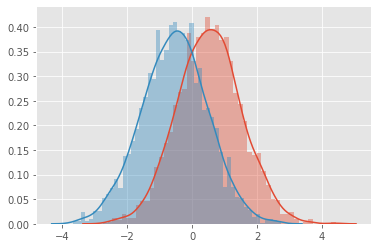

In [258]:
sns_plot = sns.distplot(data1, bins=50)
sns_plot = sns.distplot(data2, bins=50)
sns_plot.figure.savefig("Distribution mu1.png")

In [259]:
# Combining the data
df = df1.append(df2)
print(df.shape)
data = np.concatenate([data1,data2])
print(data.shape)

(6000, 1)
(6000,)


### K-Means

In [260]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init = 100)

In [261]:
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [262]:
kmeans.cluster_centers_

array([[-0.90136263],
       [ 0.90535806]])

In [263]:
print(df[kmeans.labels_ == 0].std())
print(df[kmeans.labels_ == 1].std())

0    0.690095
dtype: float64
0    0.674879
dtype: float64


The standard deviations appear to have shrunk!

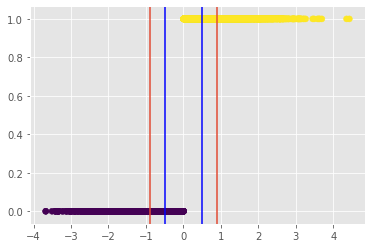

In [264]:
ax = plt.scatter(df,kmeans.labels_, c=kmeans.labels_ )
for mean in kmeans.cluster_centers_:
    plt.axvline(x=mean)
ax = plt.axvline(-mu1, c='b')
ax = plt.axvline(mu1, c='b')
ax.figure.savefig('Kmeans - Mean Shift mu1.png')

Note that the means generated with KMeans are noticable biased towards larger absolute values i.e. further away from 0  
Just like what we discussed in class!

### GMM

In [265]:
# The default assumption is 'full', but I will first try with 'spherical', because that's the truth 
gmm = GaussianMixture(n_components=2, covariance_type='spherical', random_state=42, n_init=100)

In [266]:
gmm.fit(df)

GaussianMixture(covariance_type='spherical', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=100,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [267]:
# These are the means
gmm.means_

array([[ 0.68340782],
       [-0.70022545]])

In [268]:
# These are the standard deviations
np.sqrt(gmm.covariances_)

array([0.88882433, 0.9036587 ])

In [269]:
# These are the labels
gmm.predict(df)

array([0, 0, 0, ..., 1, 1, 1])

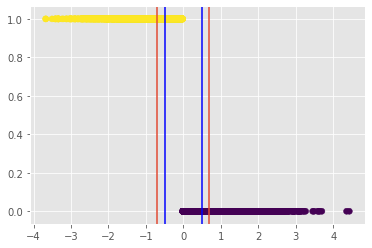

In [270]:
ax = plt.scatter(df,gmm.predict(df), c=gmm.predict(df) )
for mean in gmm.means_:
    plt.axvline(x=mean)
ax = plt.axvline(-mu1, c='b')
ax = plt.axvline(mu1, c='b')
ax.figure.savefig('GMM - Mean Shift mu1.png')

Note that the means have not shifted as much as with KMeans. 
This means there's less bias with GMM

Note also that the variances didn't shrink as much

In [271]:
# KMeans means
print(kmeans.cluster_centers_)
# GMM Means
print(gmm.means_)

[[-0.90136263]
 [ 0.90535806]]
[[ 0.68340782]
 [-0.70022545]]


In [272]:
# KMeans Standard Deviations
print((df[kmeans.labels_ == 0].std()[0], df[kmeans.labels_ == 1].std()[0]))
# GMM Standard Deviations
print(np.sqrt(gmm.covariances_))

(0.6900948083162431, 0.6748790521604103)
[0.88882433 0.9036587 ]


After repeating all of the above steps, but with different means for generating data (mu2, and mu3) we get the below

mu1 - means

[[-0.90136263]
 [ 0.90535806]]  k- Means
 
[[ 0.68340782]
 [-0.70022545]]  Gmm

mu1 - standard deviations  
(0.6900948083162431, 0.6748790521604103)  
[0.88882433 0.9036587 ]


mu2 - means  
[[-1.21723997]
 [ 1.1571772 ]]  
 
[[-1.08188771]
 [ 1.02226646]]

mu2 - standard deviations  
(0.8102111703471394, 0.8125527138912274)  
[0.98094532 0.97945201]

mu3 - means  
[[ 2.03866162]
 [-2.06267674]]  
[[ 2.02812143]
 [-2.04424509]]

mu3 - standard deviations  
(0.9619888568606922, 0.9691381046521211)  
[0.98872345 1.0023763 ]

We note that, with more 'distant' Gaussians, the standard deviation estiamtion becomes more accurate  
We also note that the distance between the means is also less significant.

In each instance, however, GMM gives better estimates!